Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yifei Fan"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

# Homework 1:  Introduction

## Question 1 - Basic Linear Algebra

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = \mathbf{b}$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

Solution: 
$$
    \begin{bmatrix} 
        2 & 1 \\
        1 & 3
    \end{bmatrix}
    \begin{bmatrix} 
        x_{1} \\ 
        x_{2}
    \end{bmatrix} 
    = \begin{bmatrix} 
        1 \\ 
        -2
    \end{bmatrix} 
$$
is equivalent to the system
$$
    \begin{cases} 2x_{1} + x_{2} = 1 \\ x_{1} + 3x_{2}= -2  \end{cases}
$$
by solving this system I got $ x_{1}=1 $ and $ x_{2}=-1$.

That is $x=\begin{bmatrix} 
        1 \\
        -1
    \end{bmatrix}$

**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

Solution: 

3 times the equation 1 is the same as the equation 2, which means they are linearly dependent. The solution will be any x and y that satisfy 2x+3y=1

**(c)** (5) Why will I not be able to solve $A\mathbf{x}=\mathbf{b}$ for

$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    \mathbf{b} = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$

Explain why this is a problem in terms of the four fundamental subspace of the matrix  $A$ and how that relates to the vector $\mathbf{b}$.

Answer: 
    Since rank(A)=2 and m=3, rank(A)<m, and b is not a linear combination of columns of A. 

## Question 2 -- a simple python function

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance). Remember to raise an exception if the sum does not converge.

Also, please,  remove the `# YOUR CODE HERE` and `raise NotImplementedError` lines in your final code. (Hopefully you did implement it and the exception is not needed).

In [3]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """
    computed_sum=0
    if abs(a/b) >= 1:
        raise ValueError()
    ps=a
    while abs(ps) > tolerance:
        computed_sum=computed_sum+ps
        ps=ps*a/b
    return computed_sum

In [4]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the absolute error
$$
    e = \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
as a function of the tolerance.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

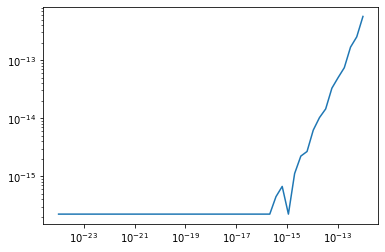

In [5]:
tolerance=numpy.logspace(10^(-30),10^(-2))
absolute_error=[abs(compute_sum(-2,3,k)+1.2) for k in tolerance]
plt.loglog(tolerance,absolute_error)

The absolute error does not decrease much as the tolerance goes below $10^{-16}$

## Question 3 - Taylor Series

(7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$. Hint: check using `Sympy`

First 3 terms of $f(x)=f(\pi)+f'(\pi)(x-\pi)+\frac{f''(\pi)}{2}(x-\pi)^2=e^{-\pi^2}sin(0)+-e^{-\pi^2} (cos(\pi) - 2 \pi sin(\pi))(\pi-\pi)+e^{-\pi^2} (4 \pi cos(\pi) + (3 - 4 \pi^2) sin(\pi))(\pi-\pi)^2/2=0+0+0$

## Question 4 - Basic ODE's

(8) Solve the constant coefficient ODE (analytically)
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Comment on its behavior as $t \rightarrow \infty$.

$e^{rt''}+e^{rt'}+\frac{5}{4}e^{rt}=0$

$r=-\frac{1}{2}\pm i$

$u(t)=e^{-(1/2)t}(c_1cos(t)+c_2sin(t))$

$u(0)=c_1=3$

$u^{'}(0)=-(3/2)+c_2=1$

$c_2=5/2$

$u(t)=e^{-(1/2)t}(3cos(t)+(5/2)sin(t))$

As $t \rightarrow \infty$,  $u(t)\rightarrow 0$

Plot the solution $u(t)$

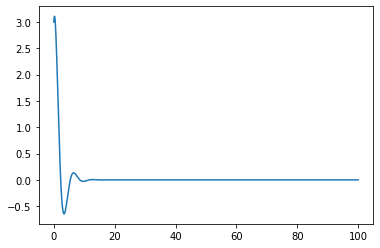

In [6]:
x = numpy.linspace(0,100,1000)
y=[numpy.exp(-0.5*k)*(3*numpy.cos(k)+2.5*numpy.sin(k)) for k in x]
plt.plot(x,y)

## Question 5 - using matplotlib

(5) Plot something "fun" making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

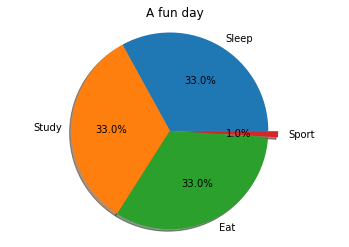

In [7]:
labels = 'Sleep', 'Study', 'Eat', 'Sport'
sizes = [33, 33, 33, 1]
explode = (0, 0, 0, 0.1) 

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax.axis('equal') 
plt.title('A fun day')
plt.show()

## Question 6 - The Trouble with Tribbles

**The Problem**
The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.

**(a)** (2) Write a function that confirms Spock's estimate

In [8]:
def N(t):
    """ return the number of tribbles at time t (in days) given that 1 tribble will reproduce 
        asexually every 12 hours to produce 10 more tribbles.  N can be a real number
    """
    return numpy.power(11,2*t)

In [9]:
assert(N(3) == 1771561)

**(b)** (3) Make a plot of N(t) for t=3 days (assuming it is a continous function), using the appropriate plot types making sure to adding labels, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

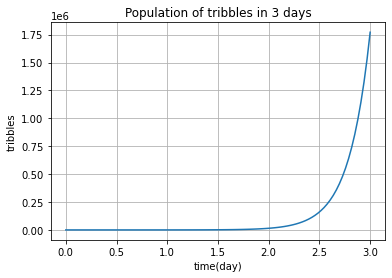

In [10]:
x = numpy.linspace(0, 3, 100)
y = [N(t) for t in x]
plt.plot(x,y)
plt.title('Population of tribbles in 3 days')
plt.ylabel('tribbles')
plt.xlabel('time(day)')
plt.grid(True)
plt.show()

**(c)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

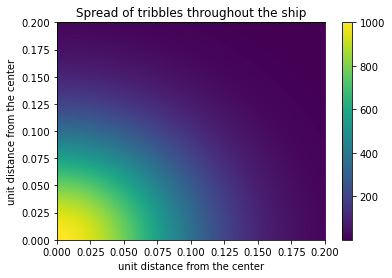

In [11]:

x = numpy.linspace(0, 0.2, 1000)
y = numpy.linspace(0, 0.2, 1000)
X, Y = numpy.meshgrid(x, y) 
N=1000*numpy.exp(-100*(numpy.square(X)+numpy.square(Y)))
c=plt.pcolormesh(X,Y,N) 
plt.title('Spread of tribbles throughout the ship')
plt.ylabel('unit distance from the center')
plt.xlabel('unit distance from the center')
plt.colorbar(c)
plt.show()